Viinien luokittelu
==============

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def process_data(name, label):
    wine = pd.read_csv(name, index_col=False)
    wine['quality'] = wine.quality - 3
    wine['label'] = label 
    return wine
    
red = process_data("../winequality-red.csv", 0)
white = process_data("../winequality-white.csv", 1)

wine = pd.concat([red, white])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,3,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,3,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,4,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,3,1


In [52]:
y = wine['quality']
X = wine[['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 #'quality'
         ]]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2162,9.9,0.49,0.23,2.4,0.087,19.0,115.0,0.9948,2.77,0.44,9.4


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=0.9)), ('svm', SVC())])

parameters = {'svm__C':[1,10,20, 0.01, 100], 'svm__gamma':[1,10,100, 0.01, 0.001]}
clf = GridSearchCV(pipe, parameters, n_jobs=-1)
clf.fit(X_train, y_train)
print("Parhaat parametrit: ", clf.best_params_)
print("Paras opetus OA: {:.4f}".format(clf.best_score_))
print("OA: {:.4f}".format(clf.score(X_test, y_test)))

/home/joona/IdeaProjects/MLCourse/venv/forNb/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Parhaat parametrit:  {'svm__C': 10, 'svm__gamma': 1}
Paras opetus OA: 0.5852
OA: 0.6149


In [38]:
from sklearn.decomposition import PCA
# TODO: None
pca = PCA(n_components=0.99)
pca.fit(X_train)
X_train = pca.transform(X_train)
print("Muuttujien määrä oli ennen 4, nyt se on ", len(X_train[0]))

# TODO: [kuvaaja](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

Muuttujien määrä oli ennen 4, nyt se on  11


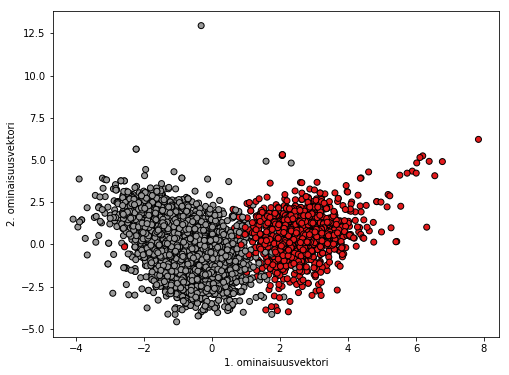

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1,
            edgecolor='k')
ax.set_xlabel('1. ominaisuusvektori')
ax.set_ylabel('2. ominaisuusvektori')
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

Coefficients: 
 [ 0.8933749   0.05352358  0.16061288  0.41422358 -0.07708835 -0.02918547
 -0.09431581 -1.12178477  0.57512241  0.22174003]
Mean squared error: 0.36


In [5]:
parcels = pd.read_csv("../lohkot.csv", sep=";", index_col=False)
groups = pd.read_csv("../goups.csv")

['A' 'B' 'D' 'E' 'C' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'Q' 'T' 'U'
 'P' 'R' 'S' 'V' 'W' 'X' '2' '3' 'Y' '1' 'LI' 'Ù' 'Ø' 'Ú' '3A' '2A' '4B'
 '4C' '2B' '4A' 'AA' 'AB' 'AC' 'AD' 'AE' 'Z' 'AF' 'AG' 'AH' 'AI' 'AJ' 'AK'
 'AL' 'AM' 'AN' 'AO' 'AP' 'AQ' 'AR' 'AS' 'AT' 'a']


In [6]:
groups = groups.set_index('code')[['mavigroup_id']]
d = groups.to_dict()['mavigroup_id']
print(d)
parcels['group'] = parcels['KVI_KASVIKOODI'].fillna(0.0).astype(int)
parcels['group'] = parcels.group.map(d)
parcels.group = parcels.group.fillna(-1.0).astype(int)
parcels = parcels[parcels.group != -1]


{2120: 2, 5120: 3, 9812: 7, 6121: 7, 2200: 1, 9404: 4, 4210: 5, 1400: 6, 1211: 6, 1120: 6, 1220: 6, 6111: 7, 6112: 7, 6561: 7, 2430: 7, 4110: 9, 2110: 2, 3210: 3, 9403: 4, 1545: 6, 1320: 6, 1310: 6, 4905: 7, 9820: 7, 9811: 7, 9810: 7, 9405: 7, 6125: 7, 6123: 7, 6122: 7, 4904: 7, 6210: 7, 9424: 7, 6220: 7, 9423: 7, 6300: 7, 3160: 8, 3120: 8, 3110: 8, 1230: 10, 5101: 2, 1605: 6, 1602: 6, 1601: 6, 1603: 6, 9805: 7, 6050: 7, 6051: 7, 9412: 7, 3190: 8, 3150: 8, 3130: 8, 1141: 10, 1110: 10}


In [7]:
print(parcels.columns)
parcels_sample = parcels.sample(frac=0.1)
X = parcels_sample[['X', 'Y','KASVULOHKOTUNNUS', 'LUOMUVKD_KOODI', 'SIELAKD_KOODI', 'PINTAALA', 'ONKOEKOLOGINENALA']]
d_a = {i: x for x, i in enumerate(list(X['KASVULOHKOTUNNUS'].unique()))}
X['KASVULOHKOTUNNUS'] = X['KASVULOHKOTUNNUS'].map(d_a)
print(X['KASVULOHKOTUNNUS'].unique())
y = parcels_sample.group
parcels.head(5)

Index(['X', 'Y', 'fid', 'KLILM_TUNNUS', 'VUOSI', 'MAATILA_TUNNUS',
       'PLVUOSI_PERUSLOHKOTUNNUS', 'KASVULOHKOTUNNUS', 'KVI_KASVIKOODI',
       'KLE_LAJIKEKOODI', 'LUOMUVKD_KOODI', 'SIELAKD_KOODI', 'PINTAALA',
       'ONKOEKOLOGINENALA', 'LISATIETO', 'JATTOPVM', 'PERPVM', 'PAIPVM',
       'group'],
      dtype='object')
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


/home/joona/IdeaProjects/MLCourse/venv/forNb/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,X,Y,fid,KLILM_TUNNUS,VUOSI,MAATILA_TUNNUS,PLVUOSI_PERUSLOHKOTUNNUS,KASVULOHKOTUNNUS,KVI_KASVIKOODI,KLE_LAJIKEKOODI,LUOMUVKD_KOODI,SIELAKD_KOODI,PINTAALA,ONKOEKOLOGINENALA,LISATIETO,JATTOPVM,PERPVM,PAIPVM,group
0,287195.676556,7.024374e+06,1,8334853,2018,4000541,40235903,A,1400.0,59,0,9,237,2,NaN,NaN,NaN,NaN,6
1,288354.235498,7.024197e+06,2,8334854,2018,4000541,40236004,A,6121.0,NaN,0,0,88,2,NaN,NaN,NaN,NaN,7
2,288659.031144,7.024069e+06,3,8334855,2018,4000541,40236307,A,1400.0,59,0,9,38,2,NaN,NaN,NaN,NaN,6
3,289127.901315,7.025355e+06,4,8334856,2018,4000541,40343916,A,6121.0,NaN,0,0,185,2,NaN,NaN,NaN,NaN,7
4,289046.132146,7.025251e+06,5,8334857,2018,4000541,40344219,A,6121.0,NaN,0,0,134,2,NaN,NaN,NaN,NaN,7


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8, random_state=42)

clf = Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=0.8)), ('svm',SVC())])


In [20]:
print(len(y_train), len(y_test), y_train.unique(), y_test.unique())

19065 76260 [ 6  8  7  4  1 10  5  9  3  2] [ 7  6  5  9  3  4  8 10  1  2]


In [21]:
from sklearn.model_selection import GridSearchCV
parameters = {'svm__C':[1], 'svm__gamma':[1]}
print(clf.get_params().keys())
clf = GridSearchCV(clf, parameters, cv=2, n_jobs=-1)
clf.fit(X_train, y_train)
print("Parhaat parametrit: ", clf.best_params_)
print("Paras opetus OA: {:.4f}".format(clf.best_score_))
print("OA: {:.4f}".format(clf.score(X_test, y_test)))

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'pca', 'svm', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'svm__C', 'svm__cache_size', 'svm__class_weight', 'svm__coef0', 'svm__decision_function_shape', 'svm__degree', 'svm__gamma', 'svm__kernel', 'svm__max_iter', 'svm__probability', 'svm__random_state', 'svm__shrinking', 'svm__tol', 'svm__verbose'])
Parhaat parametrit:  {'svm__C': 1, 'svm__gamma': 1}
Paras opetus OA: 0.9054
OA: 0.9041


In [ ]:
print(clf)